In [110]:
import pickle
import numpy
import torch

with open('/mnt/disk1/ivymm02/stylegan2-ada-pytorch/ffhq_train/00002-ffhq256-auto1/network-snapshot-001600.pkl', 'rb') as f:
    FFHQ = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module
    # latent codes
SEED=20
z = torch.randn([1, FFHQ.z_dim]).cuda()
c = None                                # class labels (not used in this example)
img1 = FFHQ(z, c)                           # NCHW, float32, dynamic range [-1, +1]

In [87]:
FFHQ

Generator(
  (synthesis): SynthesisNetwork(
    (b4): SynthesisBlock(
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b8): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b16): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b32): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConn

In [111]:
ckpt_path = '/mnt/disk1/ivymm02/stylegan2-ada-pytorch/happy3/00000-happy_3-auto1-resumecustom/network-snapshot-000400.pkl'
with open(ckpt_path, 'rb') as f:
    HAPPY = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module
img2 = HAPPY(z, None)   

In [112]:
del new_f
new_f = HAPPY

#new_f.mapping= FFHQ.mapping

new_f.synthesis.b4.torgb= FFHQ.synthesis.b4.torgb
new_f.synthesis.b8.torgb= FFHQ.synthesis.b8.torgb
new_f.synthesis.b16.torgb= FFHQ.synthesis.b16.torgb
new_f.synthesis.b32.torgb= FFHQ.synthesis.b32.torgb
new_f.synthesis.b64.torgb= FFHQ.synthesis.b64.torgb
new_f.synthesis.b128.torgb= FFHQ.synthesis.b128.torgb
new_f.synthesis.b256.torgb= FFHQ.synthesis.b256.torgb
# new_f.synthesis.b8= FFHQ.synthesis.b8
# new_f.synthesis.b16= FFHQ.synthesis.b16
# #new_f.synthesis.b32= TOON.synthesis.b32
# new_f.synthesis.b64 = FFHQ.synthesis.b64
# new_f.synthesis.b128.conv1 = FFHQ.synthesis.b128.conv1
# new_f.synthesis.b128.torgb= FFHQ.synthesis.b128.torgb
# new_f.synthesis.b256.conv1= FFHQ.synthesis.b256.conv1
# new_f.synthesis.b256.torgb= FFHQ.synthesis.b256.torgb

img4= new_f(z, None)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0346438..1.251746].


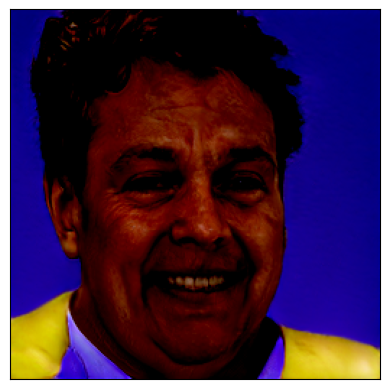

In [113]:
import matplotlib.pyplot as plt
plt.xticks([])
plt.yticks([])
plt.imshow(img1.cpu().detach().permute(0, 2, 3, 1)[0].numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7591593..0.7780778].


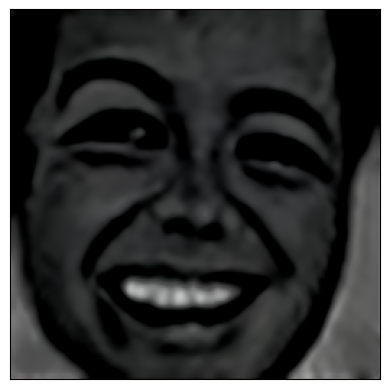

In [114]:
import matplotlib.pyplot as plt
plt.xticks([])
plt.yticks([])
plt.imshow(img2.cpu().detach().permute(0, 2, 3, 1)[0].numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6816801..0.93025184].


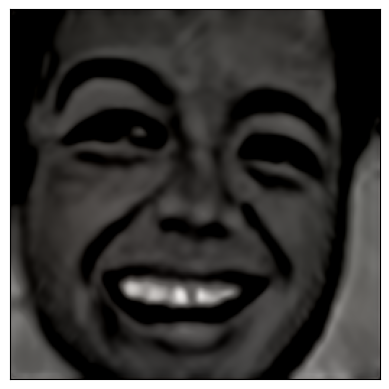

In [115]:
import matplotlib.pyplot as plt
plt.xticks([])
plt.yticks([])
plt.imshow(img4.cpu().detach().permute(0, 2, 3, 1)[0].numpy())

In [ ]:
!

: 

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

: 

In [222]:
!python projector.py --outdir=out --target=/mnt/disk1/ivymm02/stylegan2-ada-pytorch/jobs.png \
    --network=/mnt/disk1/ivymm02/stylegan2-ada-pytorch/ffhq_train/00002-ffhq256-auto1/network-snapshot-001600.pkl

Loading networks from "/mnt/disk1/ivymm02/stylegan2-ada-pytorch/ffhq_train/00002-ffhq256-auto1/network-snapshot-001600.pkl"...
Computing W midpoint and stddev using 100 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Traceback (most recent call last):
  File "/mnt/disk1/ivymm02/stylegan2-ada-pytorch/projector.py", line 210, in <module>
    run_projection() # pylint: disable=no-value-for-parameter
  File "/home/ivymm02/anaconda3/envs/myenv/lib/python3.9/site-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/home/ivymm02/anaconda3/envs/myenv/lib/python3.9/site-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/home/ivymm02/anaconda3/envs/myenv/lib/python3.9/site-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/home/ivymm02/anaconda3/envs/myenv/lib/python3.9/site-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)

In [ ]:
!python generate.py --outdir=out --projected_w=out/projected_w.npz \
    --network=/mnt/disk1/ivymm02/stylegan2-ada-pytorch/cartoon_train/00006-cartoon-auto1/network-snapshot-001400.pkl

In [ ]:
!python generate.py --outdir=out --projected_w=out/projected_w.npz \
    --network=